# 1. Download the Dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d kasikrit/att-database-of-faces

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method.


In [ ]:
!mkdir att_faces
!unzip att_faces/dataset.zip -d att_faces

mkdir: cannot create directory ‘att_faces’: File exists
Archive:  att_faces/dataset.zip
  inflating: att_faces/README        
  inflating: att_faces/s1/1.pgm      
  inflating: att_faces/s1/10.pgm     
  inflating: att_faces/s1/2.pgm      
  inflating: att_faces/s1/3.pgm      
  inflating: att_faces/s1/4.pgm      
  inflating: att_faces/s1/5.pgm      
  inflating: att_faces/s1/6.pgm      
  inflating: att_faces/s1/7.pgm      
  inflating: att_faces/s1/8.pgm      
  inflating: att_faces/s1/9.pgm      
  inflating: att_faces/s10/1.pgm     
  inflating: att_faces/s10/10.pgm    
  inflating: att_faces/s10/2.pgm     
  inflating: att_faces/s10/3.pgm     
  inflating: att_faces/s10/4.pgm     
  inflating: att_faces/s10/5.pgm     
  inflating: att_faces/s10/6.pgm     
  inflating: att_faces/s10/7.pgm     
  inflating: att_faces/s10/8.pgm     
  inflating: att_faces/s10/9.pgm     
  inflating: att_faces/s11/1.pgm     
  inflating: att_faces/s11/10.pgm    
  inflating: att_faces/s11/2.pgm     


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np

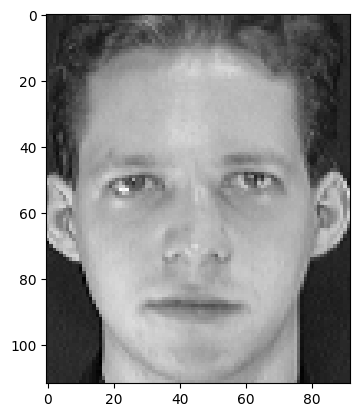

In [ ]:
testImage = img.imread('att_faces/s1/1.pgm')
plt.imshow(testImage, cmap='gray')
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
print(testImage)

[[48 49 45 ... 56 56 54]
 [45 52 39 ... 52 50 51]
 [45 50 42 ... 48 53 50]
 ...
 [50 48 50 ... 45 46 46]
 [45 54 49 ... 46 47 47]
 [51 51 51 ... 47 46 46]]


In [ ]:
print(len(testImage))

112


In [ ]:
print(len(testImage[0]))

92


# 2. Generate the Data Matrix and the Label vector 

[array([64., 76., 80., ..., 35., 37., 39.]), array([41., 47., 47., ..., 35., 37., 38.]), array([ 43.,  50.,  41., ..., 158., 153., 169.]), array([39., 44., 53., ..., 29., 26., 29.]), array([42., 41., 44., ..., 42., 43., 41.]), array([44., 43., 32., ..., 43., 43., 37.]), array([48., 49., 45., ..., 47., 46., 46.]), array([63., 53., 35., ..., 41., 10., 24.]), array([34., 34., 33., ..., 37., 40., 33.]), array([60., 60., 62., ..., 32., 34., 34.]), array([35., 32., 36., ..., 25., 28., 29.]), array([ 38.,  35.,  36., ..., 138., 142., 141.]), array([34., 35., 35., ..., 31., 24., 24.]), array([30., 37., 35., ..., 26., 27., 32.]), array([ 43.,  39.,  36., ..., 154., 155., 141.]), array([ 34.,  39.,  35., ..., 135., 138., 148.]), array([ 35.,  36.,  37., ..., 144., 147., 143.]), array([34., 36., 35., ..., 32., 25., 25.]), array([ 37.,  34.,  38., ..., 135., 143., 133.]), array([37., 35., 35., ..., 26., 28., 28.]), array([101., 104., 104., ...,  42.,  46.,  43.]), array([109., 111., 108., ...,  52

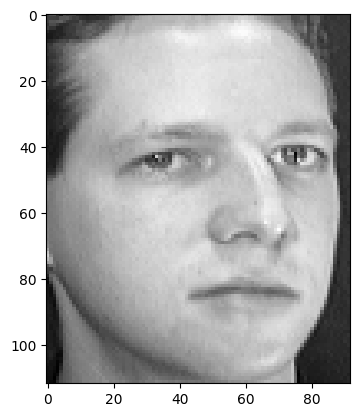

In [ ]:
data = []
y = []
for i in range(1, 41):
  path = f'att_faces/s{i}'
  images_names = os.listdir(path)
  for image_name in images_names:
    image = img.imread(f'{path}/{image_name}')
    data.append(np.array(image, dtype='float64').flatten())
    y.append(i)
print(data)
plt.imshow(data[0].reshape(112, 92), cmap='gray')
plt.show()

In [ ]:
df = pd.DataFrame(data)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303
0,64.0,76.0,80.0,53.0,34.0,72.0,60.0,66.0,66.0,50.0,...,31.0,28.0,34.0,32.0,35.0,34.0,35.0,35.0,37.0,39.0
1,41.0,47.0,47.0,46.0,44.0,49.0,48.0,58.0,61.0,49.0,...,27.0,34.0,35.0,34.0,36.0,34.0,39.0,35.0,37.0,38.0
2,43.0,50.0,41.0,58.0,78.0,83.0,67.0,48.0,44.0,46.0,...,167.0,164.0,164.0,162.0,159.0,156.0,155.0,158.0,153.0,169.0
3,39.0,44.0,53.0,37.0,61.0,48.0,61.0,45.0,35.0,40.0,...,23.0,30.0,36.0,32.0,28.0,32.0,31.0,29.0,26.0,29.0
4,42.0,41.0,44.0,46.0,48.0,39.0,37.0,37.0,33.0,37.0,...,42.0,33.0,39.0,39.0,40.0,41.0,43.0,42.0,43.0,41.0


In [ ]:
df['label'] = y
df

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
0,64.0,76.0,80.0,53.0,34.0,72.0,60.0,66.0,66.0,50.0,...,28.0,34.0,32.0,35.0,34.0,35.0,35.0,37.0,39.0,1
1,41.0,47.0,47.0,46.0,44.0,49.0,48.0,58.0,61.0,49.0,...,34.0,35.0,34.0,36.0,34.0,39.0,35.0,37.0,38.0,1
2,43.0,50.0,41.0,58.0,78.0,83.0,67.0,48.0,44.0,46.0,...,164.0,164.0,162.0,159.0,156.0,155.0,158.0,153.0,169.0,1
3,39.0,44.0,53.0,37.0,61.0,48.0,61.0,45.0,35.0,40.0,...,30.0,36.0,32.0,28.0,32.0,31.0,29.0,26.0,29.0,1
4,42.0,41.0,44.0,46.0,48.0,39.0,37.0,37.0,33.0,37.0,...,33.0,39.0,39.0,40.0,41.0,43.0,42.0,43.0,41.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,125.0,119.0,124.0,125.0,124.0,121.0,123.0,125.0,123.0,123.0,...,34.0,38.0,37.0,32.0,41.0,40.0,36.0,39.0,40.0,40
396,119.0,121.0,123.0,121.0,120.0,123.0,121.0,120.0,123.0,124.0,...,34.0,34.0,38.0,39.0,35.0,36.0,36.0,40.0,36.0,40
397,130.0,123.0,127.0,125.0,126.0,126.0,127.0,125.0,125.0,127.0,...,34.0,33.0,37.0,34.0,38.0,41.0,33.0,37.0,40.0,40
398,125.0,124.0,124.0,126.0,123.0,125.0,127.0,123.0,124.0,124.0,...,34.0,32.0,30.0,38.0,27.0,36.0,36.0,35.0,34.0,40


In [ ]:
print(df.shape)

(400, 10305)


# 3. Split the Dataset into Training and Test sets

In [ ]:
train_data = df[1::2]
test_data = df[::2]

In [ ]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
1,39.0,44.0,53.0,37.0,61.0,48.0,61.0,45.0,35.0,40.0,...,30.0,36.0,32.0,28.0,32.0,31.0,29.0,26.0,29.0,1
3,44.0,43.0,32.0,32.0,30.0,30.0,38.0,40.0,48.0,66.0,...,42.0,42.0,40.0,33.0,29.0,37.0,43.0,43.0,37.0,1
5,60.0,60.0,62.0,53.0,48.0,51.0,61.0,60.0,71.0,68.0,...,35.0,28.0,33.0,31.0,31.0,37.0,32.0,34.0,34.0,1
7,41.0,47.0,47.0,46.0,44.0,49.0,48.0,58.0,61.0,49.0,...,34.0,35.0,34.0,36.0,34.0,39.0,35.0,37.0,38.0,1
9,43.0,50.0,41.0,58.0,78.0,83.0,67.0,48.0,44.0,46.0,...,164.0,164.0,162.0,159.0,156.0,155.0,158.0,153.0,169.0,1


In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,10295,10296,10297,10298,10299,10300,10301,10302,10303,label
0,48.0,49.0,45.0,47.0,49.0,57.0,39.0,42.0,53.0,49.0,...,44.0,40.0,41.0,49.0,42.0,44.0,47.0,46.0,46.0,1
2,64.0,76.0,80.0,53.0,34.0,72.0,60.0,66.0,66.0,50.0,...,28.0,34.0,32.0,35.0,34.0,35.0,35.0,37.0,39.0,1
4,34.0,34.0,33.0,32.0,38.0,40.0,39.0,49.0,54.0,57.0,...,44.0,38.0,30.0,37.0,30.0,36.0,37.0,40.0,33.0,1
6,63.0,53.0,35.0,36.0,33.0,34.0,31.0,35.0,39.0,43.0,...,169.0,166.0,161.0,158.0,169.0,137.0,41.0,10.0,24.0,1
8,42.0,41.0,44.0,46.0,48.0,39.0,37.0,37.0,33.0,37.0,...,33.0,39.0,39.0,40.0,41.0,43.0,42.0,43.0,41.0,1


In [ ]:
y_train = y[1::2]
y_test = y[::2]

In [ ]:
print(y_train)

[]


In [ ]:
print(y_test)

[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40]


In [ ]:
def show_images(data):
  plt.figure(1, figsize=(80, 50))
  for i in range(40):
    plt.subplot(4, 10, i+1)
    # print(i)
    # print(data)
    plt.imshow(np.array(data)[i].reshape(112, 92), cmap='gray')

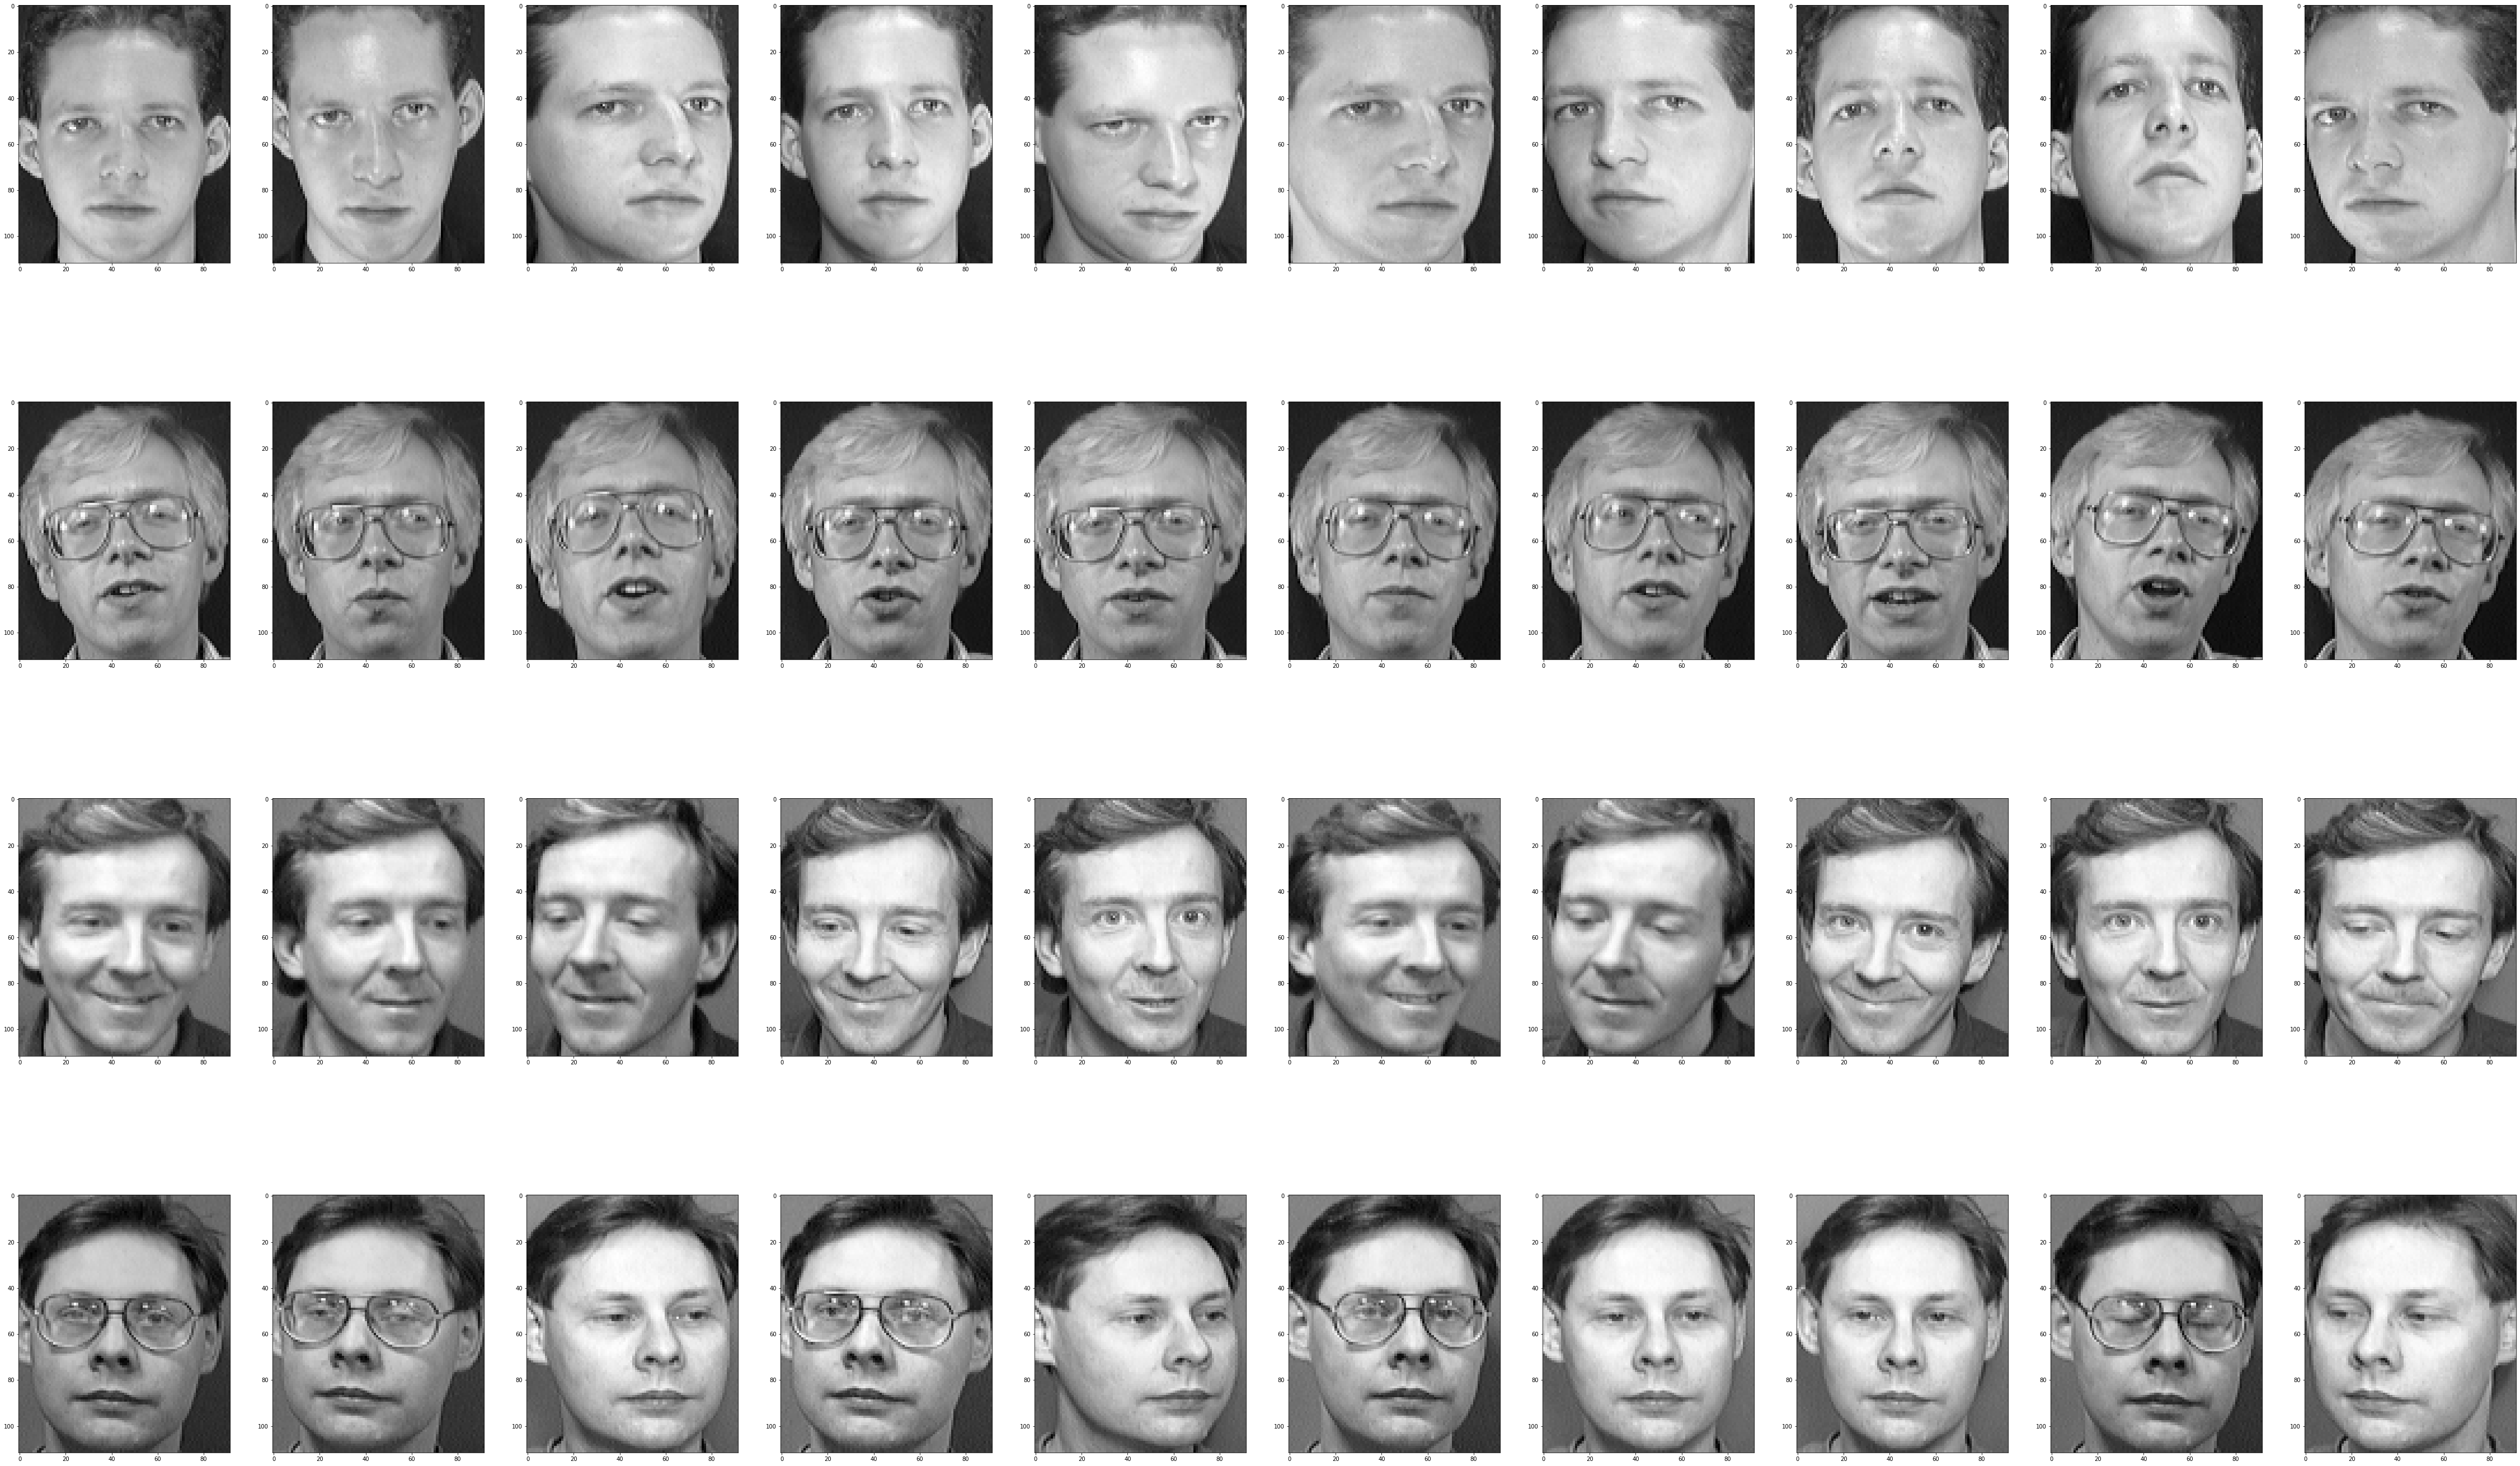

In [ ]:
show_images(df.drop(["label"],axis=1))

In [ ]:
show_images(train_data.drop(["label"],axis=1))

KeyError: ignored

In [ ]:
show_images(test_data.drop(["label"],axis=1))

KeyError: ignored

# 4. Classification using PCA

In [ ]:
def pca(data, k):
  mu = np.mean(data, axis=0)
  Z = data - mu
  covar_mat = np.cov(Z, rowvar=False)
  eigen_values , eigen_vectors = np.linalg.eigh(covar_mat)
  sorted_indices = np.argsort(eigen_values)[::-1]
  sorted_eigenvalues = eigen_values[sorted_indices]
  eignvalues_sum = sum(sorted_eigenvalues)
  sorted_eigenvectors = eigen_vectors[:, sorted_indices]
  d = len(data[0])
  r = d
  temp_sum = 0
  # print("SHape: ",covar_mat.shape)
  # for i in range(1, d):
  #   temp_sum += sorted_eigenvalues[i-1]
  #   if (temp_sum / eignvalues_sum) >= alpha:
  #     r = i
  #     break
  # print("R   :", r)
  U = sorted_eigenvectors[:, :k]
  A = np.dot(Z, U)
  # for x in Z:
  #   A.append((U.T).dot(x))
  return A, U

In [ ]:
# print(train_data.iloc[0:5, :5])
# print(train_data.iloc[0:6, :5].shape)
# print(train_data.iloc[0:5, :5].iloc[:2, :])
reduced_train_data, eigen_faces = pca(train_data.drop(["label"],axis=1), 0.8)
# reduced_train_data, eigen_faces = pca(train_data.iloc[:30, :200], 0.8)
print(reduced_train_data)
# print(len(reduced_train_data))

In [ ]:
from sklearn.decomposition import PCA
pcaBuiltIn = PCA(n_components=35)
X = pcaBuiltIn.fit_transform(train_data.drop(["label"], axis=1))
print(X)

In [ ]:
def proj_test(test_data, eigen_faces):
  centered_test = test_data  - np.mean(test_data, axis=0)
  return np.dot(centered_test, eigen_faces)

In [ ]:
proj_test(test_data.drop(['label'], axis=1), eigen_faces)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]
accuracies = []
rs = []
for i, alpha in enumerate(alphas):
  reduced_train_data, eigen_faces = pca(train_data.drop(["label"],axis=1), alpha)
  print(f'alpha: {alpha} R: {len(reduced_train_data[0])}')
  knn = KNeighborsClassifier(weights='distance')
  knn.fit(reduced_train_data, y_train)
  y_pred = knn.predict(proj_test(test_data.drop(['label'], axis=1), eigen_faces))
  rs.append(len(reduced_train_data[0]))
  accuracies.append(accuracy_score(y_test, y_pred))

R   : 36
alpha: 0.8 R: 36
R   : 51
alpha: 0.85 R: 51
R   : 75
alpha: 0.9 R: 75
R   : 115
alpha: 0.95 R: 115


[0.89, 0.89, 0.885, 0.87]


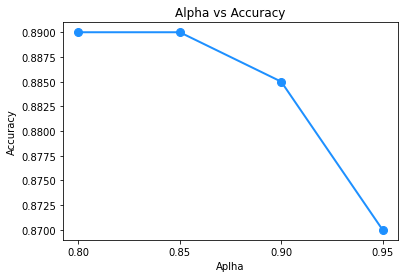

In [ ]:
print(accuracies)
plt.plot(alphas, accuracies, color='dodgerblue', marker='o', linewidth=2, markersize=8)
plt.title('Alpha vs Accuracy')
plt.xticks(alphas)
plt.xlabel('Aplha')
plt.ylabel('Accuracy')
plt.show()

It is shown that as alpha increase the number of pricipal components dimension increases while the accuracy increases until it reaches a certain value then it it starts to decrease

## Classification Using LDA 

In [ ]:
import scipy.linalg as la
def LDA(data , Labelspertrain):
  
  df = pd.DataFrame(data)
  arr = df.values.reshape((40, Labelspertrain, 10304))
  means = np.mean(arr, axis=1)
  mu = np.mean(data, axis=0)
  Sb = np.zeros((10304, 10304))
  for i in range(40):
    Sb += Labelspertrain * np.outer(means[i] - mu, means[i] - mu)
  j = 0
  S = np.zeros((10304, 10304)) 
  for i in range(0, len(data), Labelspertrain):
      chunk = data[i:i+Labelspertrain] 
      chunk_minus_vector = chunk - means[j]
      j=j+1
      Z = np.array(chunk_minus_vector)
      S += np.dot(Z.T,Z)
  S_inverse = la.pinv(S)
  w = np.dot(S_inverse,Sb)
  T, U = la.eig(w)
  U = np.real(U)
  sorted_indices = np.argsort(T)[::-1]
  sorted_eigenvalues = T[sorted_indices]
  sorted_eigenvectors = U[:, sorted_indices]
  eigen_faces =  sorted_eigenvectors[:, :39]
  print(eigen_faces)
  A = np.dot(data,eigen_faces)
  return A,eigen_faces

In [ ]:
reduced_train_data_LDA,Eigen_faces_LDA = LDA(train_data.drop(["label"],axis=1))
print(reduced_train_data_LDA)

In [ ]:
def Proj_test(test_data, eigen_faces):
  return np.dot(test_data, eigen_faces)

In [ ]:
Proj_test(test_data.drop(['label'], axis=1), Eigen_faces)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
  accuracies = []
  rs = []
  reduced_train_data, eigen_faces = LDA(train_data.drop(["label"],axis=1),5)
  knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
  knn.fit(reduced_train_data, y_train)
  y_pred = knn.predict(Proj_test(test_data.drop(['label'], axis=1), eigen_faces))
  rs.append(len(reduced_train_data[0]))
  accuracies.append(accuracy_score(y_test, y_pred))
  print(accuracies)

[[ 0.00193107  0.00294094 -0.00357762 ...  0.0025384   0.00120642
  -0.00100005]
 [ 0.00128335  0.00901613 -0.00092399 ... -0.0027023   0.00269711
  -0.00463581]
 [ 0.00107259  0.00742525 -0.00170104 ... -0.00202827 -0.00291086
  -0.00304344]
 ...
 [ 0.0475802   0.00146755 -0.01753236 ...  0.01557358 -0.04268256
  -0.02473916]
 [ 0.04551484  0.00012581 -0.00629979 ...  0.01132526 -0.02535193
  -0.02915525]
 [ 0.04254635 -0.01777362 -0.00113446 ...  0.00716706 -0.0290693
  -0.01986925]]
[0.945]


# **Bonus**

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

fld = LinearDiscriminantAnalysis(solver='svd')
fld.fit(train_data.drop(["label"],axis=1), y_train)
y_pred = fld.predict(test_data.drop(["label"],axis=1))
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)

Accuracy: 0.93


In [ ]:
from sklearn.decomposition import IncrementalPCA
from sklearn.svm import SVC



acc_scores = []   
ipca = IncrementalPCA(n_components=10, batch_size= 10)
X_train_pca = ipca.fit_transform(train_data.drop(["label"],axis=1))
X_test_pca = ipca.transform(test_data.drop(["label"],axis=1))
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_pca, y_train)
acc_scores.append(svm.score(X_test_pca, y_test))


print(acc_scores)    

[0.91]


In [ ]:
train = pd.DataFrame()
test = pd.DataFrame()
y_Train = []
y_Test = []
for i in range(40):
    label_data = df[i*10:(i+1)*10]  
    train_label_data = label_data[:7]  
    test_label_data = label_data[7:]  
    train = train.append(train_label_data)
    test = test.append(test_label_data)
    y_Train += [i+1]*7  
    y_Test += [i+1]*3


In [ ]:
 accuracies = []
 reduced_train_data, eigen_faces = LDA(train.drop(["label"],axis=1),7)
 knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
 knn.fit(reduced_train_data, y_Train)
 y_pred = knn.predict(Proj_test(test.drop(['label'], axis=1), eigen_faces))
 accuracies.append(accuracy_score(y_Test, y_pred))
 print(accuracies)

[[-0.00570574 -0.0007055  -0.00502843 ...  0.00867181 -0.00158265
  -0.00250203]
 [-0.00365809  0.00667091 -0.00699547 ...  0.00185987 -0.00013762
   0.00380893]
 [ 0.00081327  0.00462456 -0.00632978 ...  0.00806683 -0.00293657
   0.00254414]
 ...
 [ 0.06367089  0.00373918 -0.0125184  ...  0.0257385  -0.01955943
   0.02401913]
 [ 0.04833492 -0.01778686 -0.00813469 ...  0.00777899 -0.00339595
   0.02363073]
 [ 0.04643891 -0.02947437 -0.00444846 ...  0.01241055 -0.01037133
   0.00766114]]
[0.9666666666666667]


In [ ]:
alphas = [0.8, 0.85, 0.9, 0.95]
accuracies = []
rs = []
for i, alpha in enumerate(alphas):
  reduced_train_data, eigen_faces = pca(train.drop(["label"],axis=1), alpha)
  print(f'alpha: {alpha} R: {len(reduced_train_data[0])}')
  knn = KNeighborsClassifier(weights='distance')
  knn.fit(reduced_train_data, y_Train)
  y_pred = knn.predict(proj_test(test.drop(['label'], axis=1), eigen_faces))
  rs.append(len(reduced_train_data[0]))
  accuracies.append(accuracy_score(y_Test, y_pred))

R   : 41
alpha: 0.8 R: 41
R   : 60
alpha: 0.85 R: 60
R   : 93
alpha: 0.9 R: 93
R   : 149
alpha: 0.95 R: 149


[0.925, 0.9416666666666667, 0.9166666666666666, 0.9166666666666666]


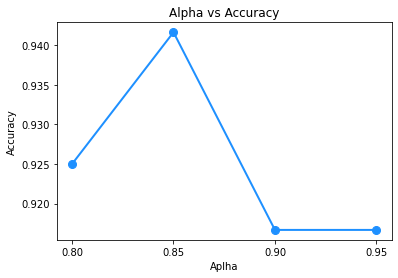

In [ ]:
print(accuracies)
plt.plot(alphas, accuracies, color='dodgerblue', marker='o', linewidth=2, markersize=8)
plt.title('Alpha vs Accuracy')
plt.xticks(alphas)
plt.xlabel('Aplha')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
import numpy as np

def fit(X_train, y_train):
    classes = np.unique(y_train)
    n_classes = len(classes)
    n_features = X_train.shape[1]

    # Calculate priors for each class
    priors = np.zeros(n_classes)
    for i, cls in enumerate(classes):
        priors[i] = np.sum(y_train == cls) / len(y_train)

    # Calculate conditional probabilities for each feature in each class
    conditional_probabilities = np.zeros((n_classes, n_features, 2))
    for i, cls in enumerate(classes):
        X_cls = X_train[y_train == cls]
        for j in range(n_features):
            feature = X_cls[:, j]
            conditional_probabilities[i, j, 0] = np.sum(feature == 0) / len(feature)
            conditional_probabilities[i, j, 1] = np.sum(feature == 1) / len(feature)

    return classes, priors, conditional_probabilities

def predict(X_test, classes, priors, conditional_probabilities):
    y_pred = []
    for x in X_test:
        posteriors = []
        for i, cls in enumerate(classes):
            prior = priors[i]
            likelihood = 1
            for j, feature in enumerate(x):
                likelihood *= conditional_probabilities[i, j, feature]
            posterior = prior * likelihood
            posteriors.append(posterior)
        y_pred.append(classes[np.argmax(posteriors)])
    return y_pred

In [ ]:
class_probs = np.array([np.mean(y_train == c) for c in np.unique(y_train)])

# Compute conditional probabilities
means = np.array([np.mean(train_data.drop(["label"],axis=1)[y_train == c], axis=0) for c in np.unique(y_train)])
variances = np.array([np.var(train_data.drop(["label"],axis=1)[y_train == c], axis=0) for c in np.unique(y_train)])

# Define the likelihood function
def pdf(x, mean, variance):
    return 1 / np.sqrt(2 * np.pi * variance) * np.exp(- (x - mean)**2 / (2 * variance))

# Define the posterior function
def posterior(x, means, variances, class_probs):
    x = np.array(x).reshape(1, -1)
    likelihoods = [pdf(x[i], means[c], variances[c]) for i in range(len(x)) for c in range(len(class_probs))]
    posteriors = np.array([class_probs[c] * np.prod(likelihoods[c*len(x):(c+1)*len(x)]) for c in range(len(class_probs))])
    return posteriors

# Define the predict function
def predict(x, means, variances, class_probs):
    posteriors = posterior(x, means, variances, class_probs)
    return np.argmax(posteriors) + 1 # add 1 to convert from 0-based index to class number

# Make predictions on the testing data
predictions = [predict(x, means, variances, class_probs) for x in test_data.drop(["label"],axis=1)]

# Evaluate performance
accuracy = np.mean(predictions == y_test)
print(f'Classification Accuracy: {accuracy}')

<ipython-input-46-9194a98244c3>:9: RuntimeWarning: divide by zero encountered in true_divide
  return 1 / np.sqrt(2 * np.pi * variance) * np.exp(- (x - mean)**2 / (2 * variance))
<ipython-input-46-9194a98244c3>:9: RuntimeWarning: invalid value encountered in multiply
  return 1 / np.sqrt(2 * np.pi * variance) * np.exp(- (x - mean)**2 / (2 * variance))
<ipython-input-46-9194a98244c3>:9: RuntimeWarning: invalid value encountered in true_divide
  return 1 / np.sqrt(2 * np.pi * variance) * np.exp(- (x - mean)**2 / (2 * variance))


Classification Accuracy: 0.0
